In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action='ignore')

import scipy.stats as stats


## Archivos

In [8]:
df = pd.read_csv('train.csv')

In [9]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Analisis de Variables

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
no_tomados = ['PassengerId', 'Name', 'Ticket', 'Cabin']
aptos = [x for x in df.columns if x not in no_tomados]
df = df[aptos]

In [ ]:
def getColsName(df):
    cols_name =  df.columns.to_list()
    return cols_name


def plotCategoricalVals(df, colums_name, y):
    for column in colums_name:
        plt.figure(figsize=(14,8))
        plot = sns.countplot(x=df[column], hue=df[y])
        plt.title(column)
        plt.show()
        print(df[column].value_counts())


def plotDiscreteVals(df, colums_name, y):
    for column in colums_name:
        plt.figure(figsize=(15,6))
        plt.subplot(121)
        sns.boxplot(x=df[y], y=df[column])
        plt.title(column)

        plt.subplot(122)
        sns.countplot(x=df[column], hue=df[y])
        plt.title(column)
        plt.show()
        print(df[column].value_counts())


def plotContinueVals(df, colums_name, y):
    for column in colums_name:
        plt.figure(figsize=(15,6))
        plt.subplot(121)
        sns.scatterplot(data=df, x=column, y=y, hue=y)
        plt.title(column)

        plt.subplot(122)
        df[column].plot.density(color="red")
        plt.title(column)
        plt.show()


def getNanGoodCols(df, rate = 0.05):
    cols_procesables = []
    for col in df.columns:
        if((df[col].isnull().mean()<rate) & (df[col].isnull().mean()>0)):
            cols_procesables.append(col)
    return cols_procesables



In [18]:
categoricascol, discretecol, continuascolscol = getColumnsDataTypes(df=df)
print(len(categoricascol) + len(discretecol) + len(continuascolscol))
discretecol.remove('Survived')

8


## Analisis de columnas categoricas 

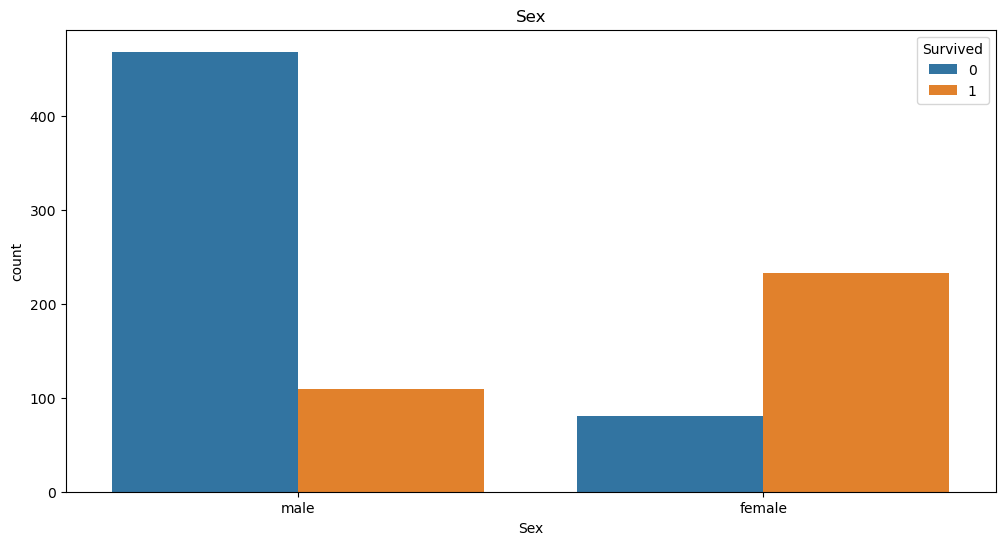

male      577
female    314
Name: Sex, dtype: int64


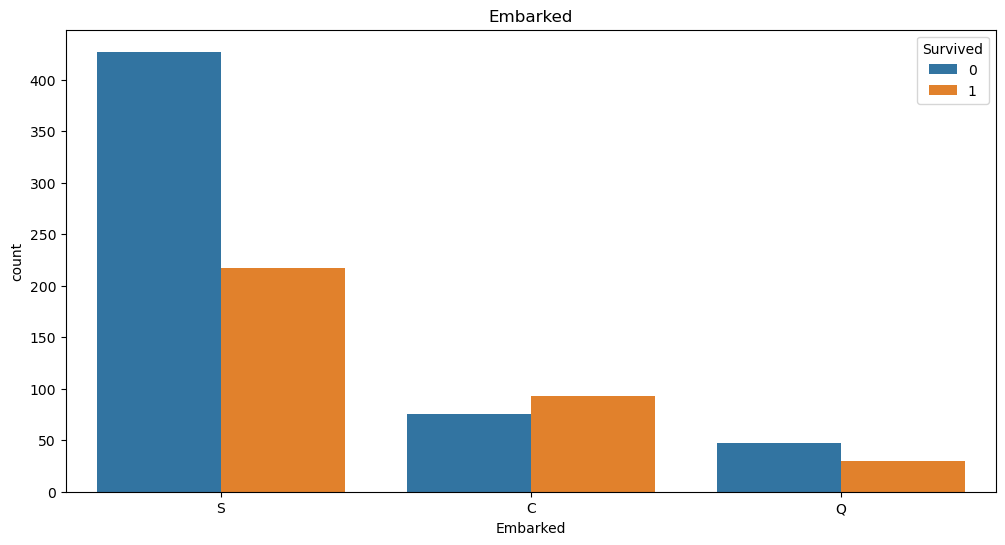

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [19]:
plotCategoricalVals(df, categoricascol, y='Survived')

## Analisis de columnas discretas

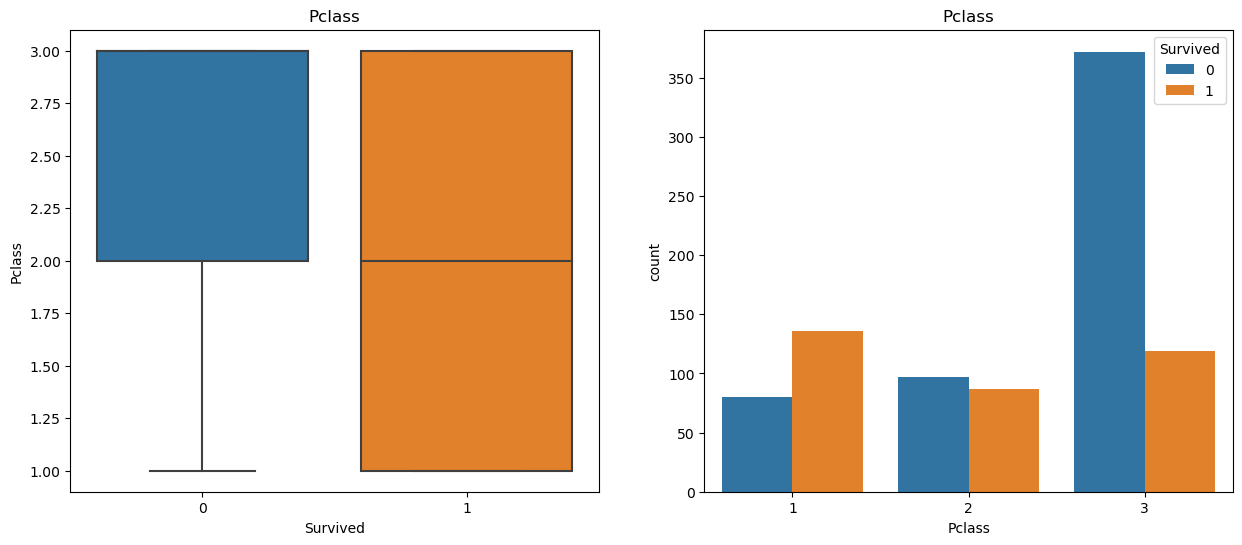

3    491
1    216
2    184
Name: Pclass, dtype: int64


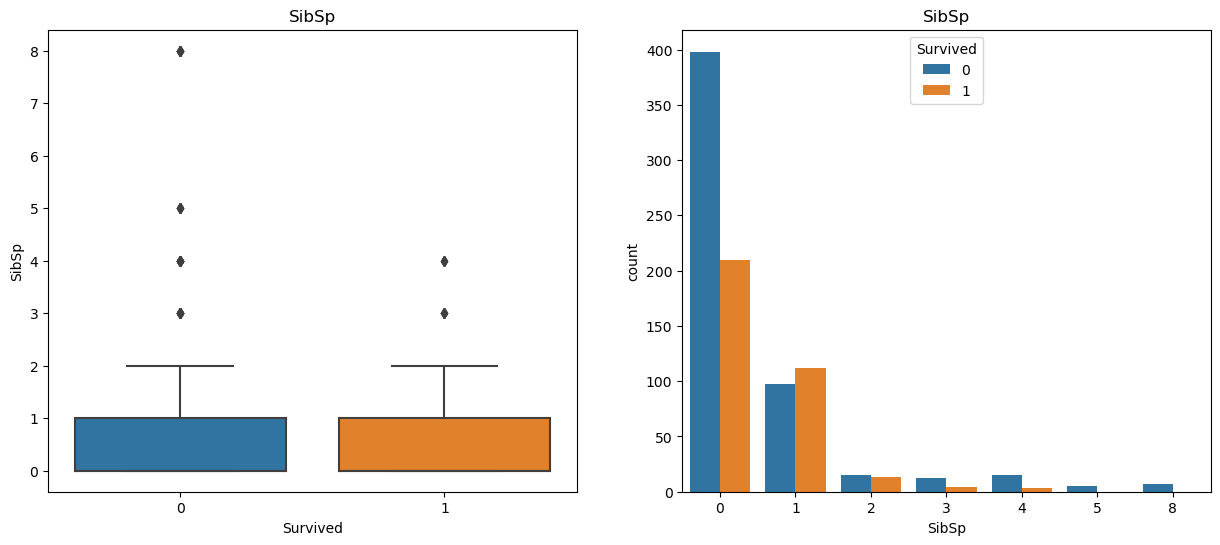

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


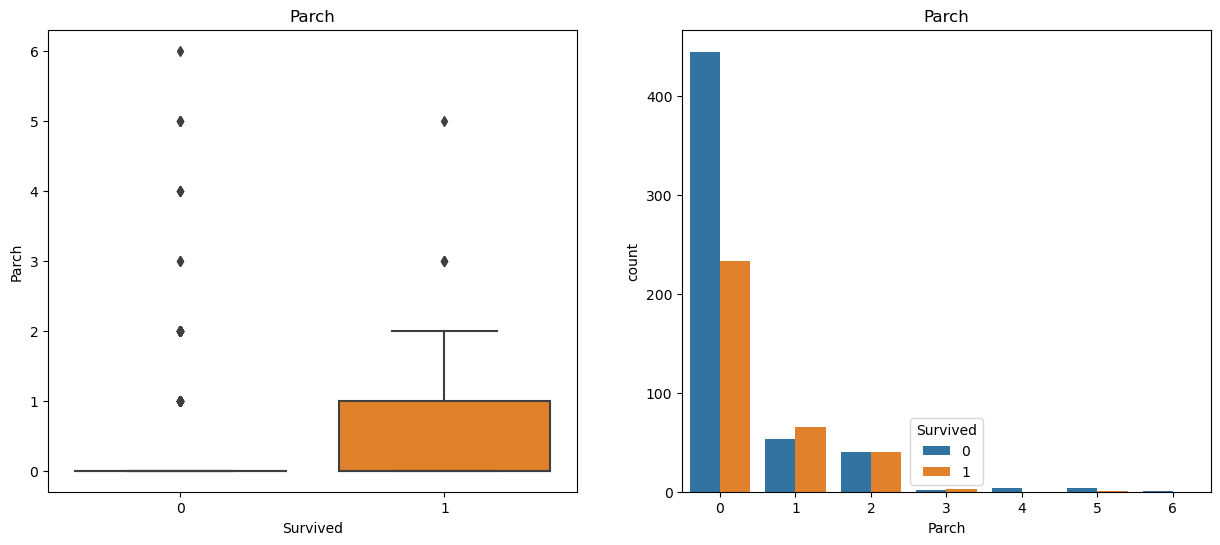

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [20]:
plotDiscreteVals(df, discretecol, y='Survived')

## Analisis de columnas continuas

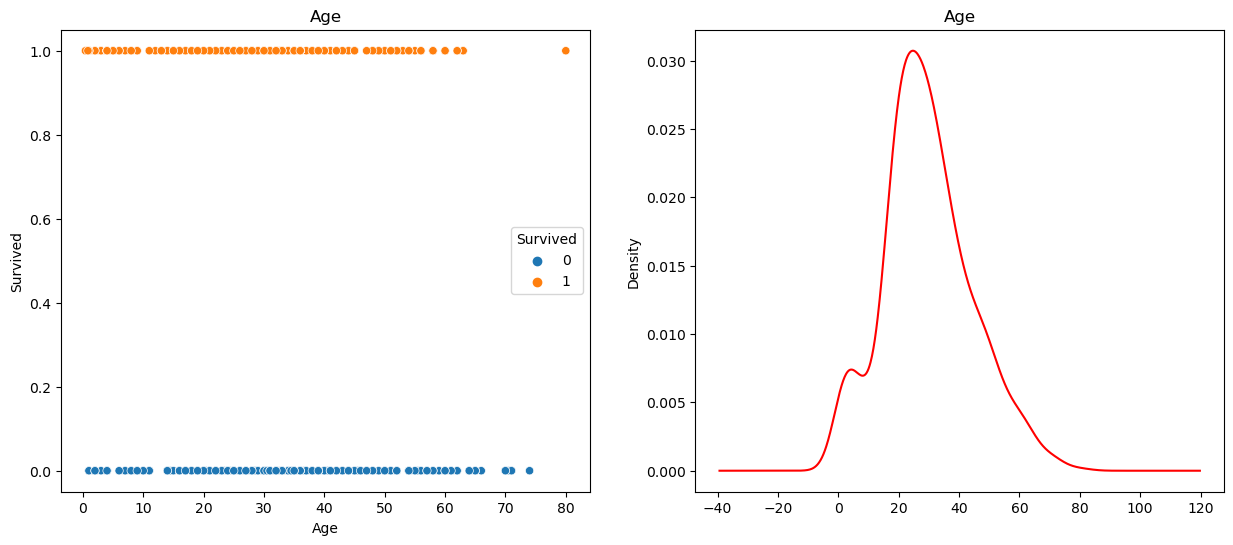

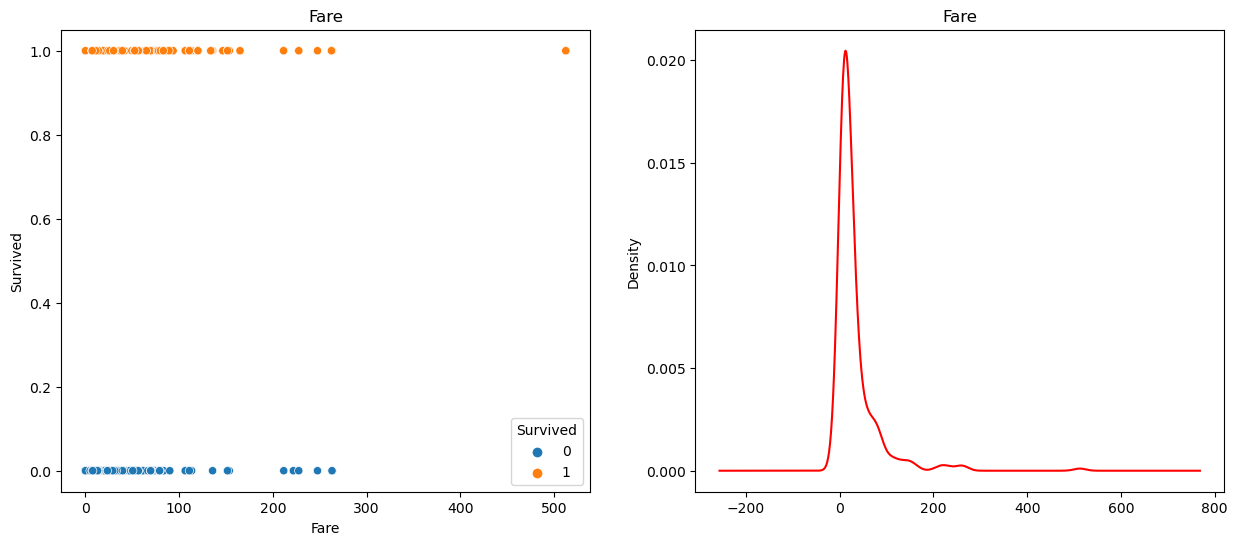

In [21]:
plotContinueVals(df, continuascolscol, y='Survived')

## Correlacion de variables

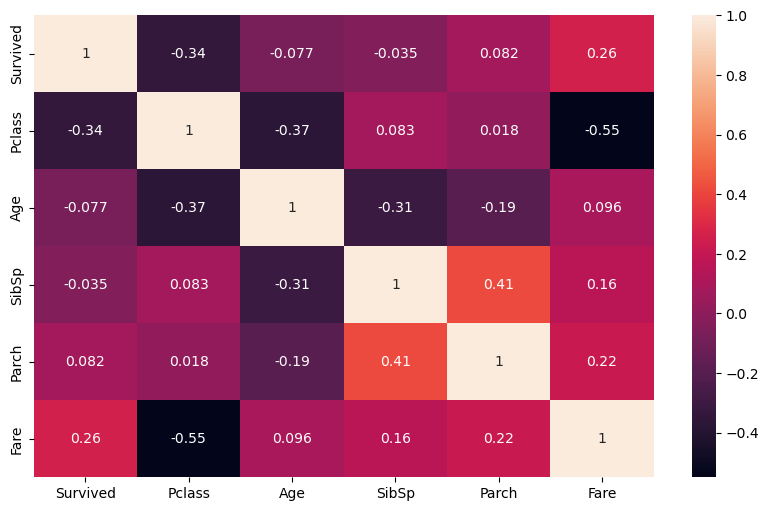

In [22]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## Distribucion de edad

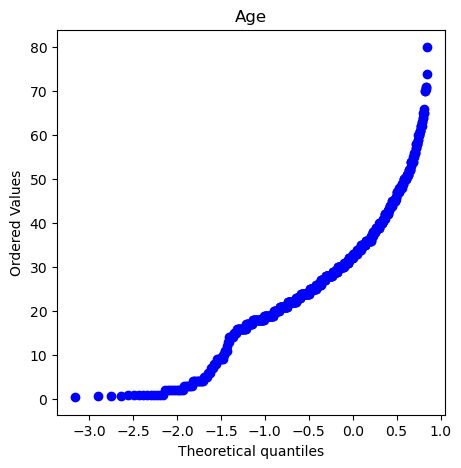

In [23]:
plt.figure(figsize = (5,5))
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Age')
plt.show()

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
df.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
